<a href="https://colab.research.google.com/github/dipsankar-sinha/TurkishRiceVarietyClassification-ML/blob/main/Classification_Problem_For_Turkish_Rice_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting the google drive for colab
#In other platform this step is not required
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the required libraries
import pandas as pd
from scipy.io import arff

In [ ]:
#loading the dataset
arff_file = arff.loadarff('/content/drive/MyDrive/Turkish_Rice_Dataset/Rice_Cammeo_Osmancik.arff')

In [ ]:
#here I have arff file that's why this method is required
#for, csv or tsv file we can directly access the dataframe object
#df=pd.read_csv('filepath/filename.csv')
#df=pd.read_csv('filepath/filename.tsv',sep='\t')

In [ ]:
df = pd.DataFrame(arff_file[0]) #this step is not required for csv and tsv files

In [ ]:
arff_file

(array([(15231., 525.57897949, 229.74987793, 85.09378815, 0.928882  , 15617., 0.57289553, b'Cammeo'),
        (14656., 494.31100464, 206.02006531, 91.73097229, 0.89540499, 15072., 0.61543632, b'Cammeo'),
        (14634., 501.12200928, 214.10678101, 87.76828766, 0.91211808, 14954., 0.69325882, b'Cammeo'),
        ...,
        (12437., 442.49899292, 183.57292175, 86.80197906, 0.88114434, 12645., 0.62673855, b'Osmancik'),
        ( 9882., 392.29699707, 161.19398499, 78.21047974, 0.8744061 , 10097., 0.65906364, b'Osmancik'),
        (11434., 404.70999146, 161.07926941, 90.86819458, 0.82569218, 11591., 0.80294943, b'Osmancik')],
       dtype=[('Area', '<f8'), ('Perimeter', '<f8'), ('Major_Axis_Length', '<f8'), ('Minor_Axis_Length', '<f8'), ('Eccentricity', '<f8'), ('Convex_Area', '<f8'), ('Extent', '<f8'), ('Class', 'S8')]),
 Dataset: Rice_Cammeo_Osmancik
 	Area's type is numeric
 	Perimeter's type is numeric
 	Major_Axis_Length's type is numeric
 	Minor_Axis_Length's type is numeric
 	Ecce

In [ ]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'


In [113]:
#Here, I have downladed the dataset from UCI Machine Learning Repository
#link: https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik
#There It was mentioned there is no null values in the data
df = df.dropna()

In [114]:
%%capture
"""
DATASET: https://www.muratkoklu.com/datasets/

Data Set Name: Rice Dataset (Commeo and Osmancik)
Abstract: A total of 3810 rice grain's images were taken for the two species (Cammeo and Osmancik), processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.

Source:
Ilkay CINAR
Graduate School of Natural and Applied Sciences,
Selcuk University, Konya, TURKEY
ilkay_cinar@hotmail.com

Murat KOKLU
Faculty of Technology,
Selcuk University, Konya, TURKEY.
mkoklu@selcuk.edu.tr

DATASET: https://www.muratkoklu.com/datasets/

Relevant Information: In order to classify the rice varieties (Cammeo and Osmancik) used, preliminary processing was applied to the pictures obtained with computer vision system and a total of 3810 rice grains were obtained. Furthermore, 7 morphological features have been inferred for each grain.  A data set has been created for the properties obtained.

Attribute Information:
1. Area: Returns the number of pixels within the boundaries of the rice grain.
2. Perimeter: Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain.
3. Major Axis Length: The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives.
4. Minor Axis Length: The shortest line that can be drawn on the rice grain, i.e. the small axis distance, gives.
5. Eccentricity: It measures how round the ellipse, which has the same moments as the rice grain, is.
6. Convex Area: Returns the pixel count of the smallest convex shell of the region formed by the rice grain.
7. Extent: Returns the ratio of the region formed by the rice grain to the bounding box pixels
8. Class: Commeo and Osmancik.

Relevant Papers / Citation Requests / Acknowledgements:
Cinar, I. and Koklu, M. (2019). Classification of Rice Varieties Using Artificial Intelligence Methods. International Journal of Intelligent Systems and Applications in Engineering, vol.7, no.3 (Sep. 2019), pp.188-194. https://doi.org/10.18201/ijisae.2019355381.
"""

In [ ]:
#further cleaning method can be applied
#I am using Z score method
from scipy.stats import zscore
import numpy as np
outliers = {}
for column in df.columns[:-1]:  # Excluding target variable 'Class'
    z_scores = zscore(df[column])
    outlier= df[np.abs(z_scores) > 3][column]  # Z-score threshold of 3, I am detecting extreme ouliers only
    outliers[column] = outlier

print("Outliers found using Z-score method are:\n", outliers)

Outliers found using Z-score method are:
 {'Area': 277     17948.0
600     18313.0
1203    18913.0
Name: Area, dtype: float64, 'Perimeter': Series([], Name: Perimeter, dtype: float64), 'Major_Axis_Length': Series([], Name: Major_Axis_Length, dtype: float64), 'Minor_Axis_Length': 277     107.542450
396      67.695343
600     106.184746
630     105.537979
774     106.337822
1177    105.670586
1203    106.948357
1231    103.804939
1765     68.986084
1824     68.901581
2205     66.918159
2502     64.871071
2745     65.930885
2770     63.565002
3025     59.532406
3231     67.932884
3539     68.802536
3674     63.344753
3735     68.607536
Name: Minor_Axis_Length, dtype: float64, 'Eccentricity': 1644    0.815600
1657    0.818751
1691    0.819296
2183    0.818498
2215    0.820558
2491    0.819935
2666    0.799511
2691    0.817018
2721    0.777233
2738    0.819225
3007    0.806216
3067    0.818851
3385    0.811163
3392    0.816083
3669    0.800538
Name: Eccentricity, dtype: float64, 'Convex_Are

In [ ]:
print("The shape of the data frame is: ", df.shape)

The shape of the data frame is:  (3810, 8)


In [ ]:
#Removing the outliers from the dataset
for column, outlier_values in outliers.items():
    df = df[~df[column].isin(outlier_values)]

In [ ]:
print("Now , After outlier removal, the shape of the data frame is: ", df.shape)

Now , After outlier removal, the shape of the data frame is:  (3776, 8)


In [ ]:
#Normalisation
#Normalising the whole data using zscore normalisation
norm_df=df.copy()
for column in norm_df.columns[:-1]:  # Excluding target variable 'Class'
    norm_df[column] = (norm_df[column] - norm_df[column].mean()) / norm_df[column].std()
    #using the z score formula, you can use standard scaler from sklearn as well

In [ ]:
norm_df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1.494222,2.012827,2.353484,-0.219269,2.065029,1.513916,-1.150408,b'Cammeo'
1,1.158100,1.127771,0.986343,0.975983,0.410544,1.203371,-0.598654,b'Cammeo'
2,1.145240,1.320560,1.452241,0.262366,1.236530,1.136134,0.410705,b'Cammeo'
3,0.292953,0.109677,0.255658,0.204758,0.235389,0.232421,-0.271385,b'Cammeo'
4,1.176806,1.491666,1.316079,0.540446,0.968310,1.311634,-0.201932,b'Cammeo'
...,...,...,...,...,...,...,...,...
3805,-0.721258,-1.092883,-1.060831,-0.099909,-1.127678,-0.759041,0.251862,b'Osmancik'
3806,-0.613699,-0.936297,-1.220532,0.567480,-2.038544,-0.601775,0.423930,b'Osmancik'
3807,-0.139037,-0.338796,-0.306901,0.088349,-0.294240,-0.179549,-0.452064,b'Osmancik'
3808,-1.632586,-1.759790,-1.596215,-1.458845,-0.627254,-1.631415,-0.032807,b'Osmancik'


In [ ]:
norm_df['Class'] = norm_df['Class'].astype(str)

In [ ]:
norm_df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1.494222,2.012827,2.353484,-0.219269,2.065029,1.513916,-1.150408,Cammeo
1,1.158100,1.127771,0.986343,0.975983,0.410544,1.203371,-0.598654,Cammeo
2,1.145240,1.320560,1.452241,0.262366,1.236530,1.136134,0.410705,Cammeo
3,0.292953,0.109677,0.255658,0.204758,0.235389,0.232421,-0.271385,Cammeo
4,1.176806,1.491666,1.316079,0.540446,0.968310,1.311634,-0.201932,Cammeo


In [ ]:
# Count the number of samples for each label in the dataset
data_label_counts = norm_df['Class'].value_counts()
print("Data Size for Each Class:")
print(data_label_counts)

Data Size for Each Class:
Class
Osmancik    2154
Cammeo      1622
Name: count, dtype: int64


In [ ]:
#It is a binary classification problem.
#Here, there are two classes the values are more or less equally distributed for two classes
#we can use other data augmentation technique to matach the value counts.
#But, here we are not doing these things.

#Now we will encode those to values as 0 and 1
norm_df['Class'] = norm_df['Class'].map({'Cammeo': 0, 'Osmancik': 1})

In [ ]:
norm_df.tail()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3805,-0.721258,-1.092883,-1.060831,-0.099909,-1.127678,-0.759041,0.251862,1
3806,-0.613699,-0.936297,-1.220532,0.567480,-2.038544,-0.601775,0.423930,1
3807,-0.139037,-0.338796,-0.306901,0.088349,-0.294240,-0.179549,-0.452064,1
3808,-1.632586,-1.759790,-1.596215,-1.458845,-0.627254,-1.631415,-0.032807,1
3809,-0.725350,-1.408434,-1.602824,0.820611,-3.034771,-0.780124,1.833393,1


In [ ]:
norm_df.drop_duplicates(inplace=True) #deleting duplicate values

In [ ]:
norm_df.dropna(inplace=True) #deleting null values

In [ ]:
#Randomly suffling the data
norm_df = norm_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
norm_df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,-0.081165,0.164618,0.408695,-0.719659,1.009745,-0.103764,-0.175573,1
1,0.478258,0.737663,0.960589,-0.293110,1.191701,0.503079,1.754847,0
2,-1.219302,-0.417796,0.161604,-2.681491,2.021879,-1.221154,-1.953797,1
3,0.489949,0.527467,0.425137,0.577107,0.140774,0.516755,1.138726,0
4,-0.255948,-0.624936,-1.109224,1.278474,-2.586775,-0.218295,0.557432,1


In [ ]:
#now generating the train-test split
#training data: 80%
#testing data: 20%
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(norm_df, test_size=0.2, random_state=42)

In [ ]:
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [ ]:
train_data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,-0.436577,-0.411824,-0.453127,-0.195655,-0.239178,-0.422856,-0.920626,1
1,1.316516,1.345921,1.332508,0.811236,0.816887,1.385709,-0.863899,0
2,0.094787,-0.249945,-0.616549,1.336199,-1.809311,0.134984,1.314294,1
3,-0.572195,-0.309669,-0.133210,-0.965145,0.686207,-0.574424,1.005660,1
4,0.841854,1.017294,1.098082,0.199863,1.000884,0.923026,-1.180445,0


In [ ]:
test_data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,-1.107067,-1.118444,-1.104075,-0.733004,-0.608843,-1.077563,0.489557,1
1,-1.377718,-1.167808,-0.906763,-1.692039,0.436734,-1.336825,0.264112,1
2,0.464229,0.583625,0.826626,-0.259934,1.065119,0.443819,0.858428,0
3,-0.429563,-0.297215,-0.090236,-0.743495,0.570165,-0.442229,-0.326849,0
4,-0.593824,-0.718542,-1.030442,0.266078,-1.428988,-0.537387,-0.398112,1


In [116]:
print("Train Data Shape:",train_data.shape)
print("Test Data Shape:",test_data.shape)

Train Data Shape: (3020, 8)
Test Data Shape: (756, 8)


In [ ]:
# Count the number of samples for each label in the training dataset
data_label_counts = train_data['Class'].value_counts()
print("Training Data Size for Each Class:")
print(data_label_counts)

Training Data Size for Each Class:
Class
1    1739
0    1281
Name: count, dtype: int64


In [ ]:
# Count the number of samples for each label in the testing dataset
data_label_counts = test_data['Class'].value_counts()
print("Testing Data Size for Each Class:")
print(data_label_counts)

Testing Data Size for Each Class:
Class
1    415
0    341
Name: count, dtype: int64


In [ ]:
#Saving these train and test split as csv file for further refernce
train_data.to_csv('rice_train_data.csv', index=False)
test_data.to_csv('rice_test_data.csv', index=False)

In [ ]:
#Here, the data preprocessing part is completed
#Now, I will train the model
#here, I have selected Logistic Regression Classifier to build the model
#Spliting the independent and dependent variables

x_train = train_data.drop('Class', axis=1) #feature matrix
y_train = train_data['Class'] #target vector
x_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']

In [ ]:
#Creating and training the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#Make predictions on the test set
y_pred = model.predict(x_test)

In [ ]:
#Calculating the acuuracy, confusion_matrix, classification Report
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["Cammeo", "Osmancik"])
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
print(confusion)

[[302  39]
 [ 22 393]]


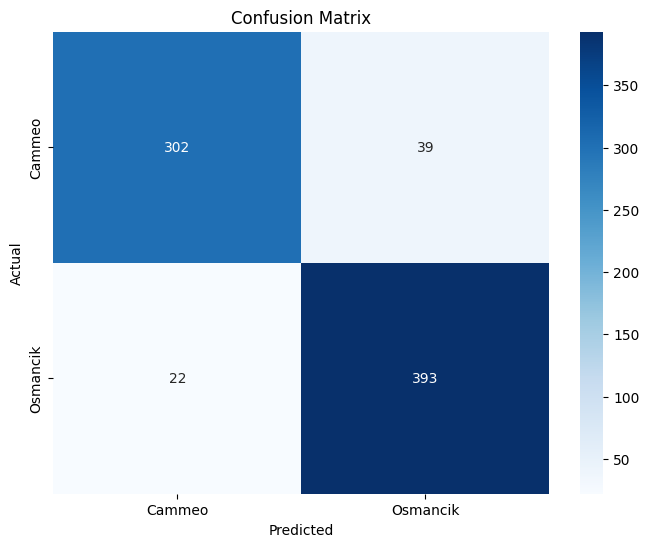

In [ ]:
#Creating a colorful Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Cammeo", "Osmancik"],
            yticklabels=["Cammeo", "Osmancik"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


In [ ]:
print(report)

              precision    recall  f1-score   support

      Cammeo       0.93      0.89      0.91       341
    Osmancik       0.91      0.95      0.93       415

    accuracy                           0.92       756
   macro avg       0.92      0.92      0.92       756
weighted avg       0.92      0.92      0.92       756

